In [2]:
import pandas as pd
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [6]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


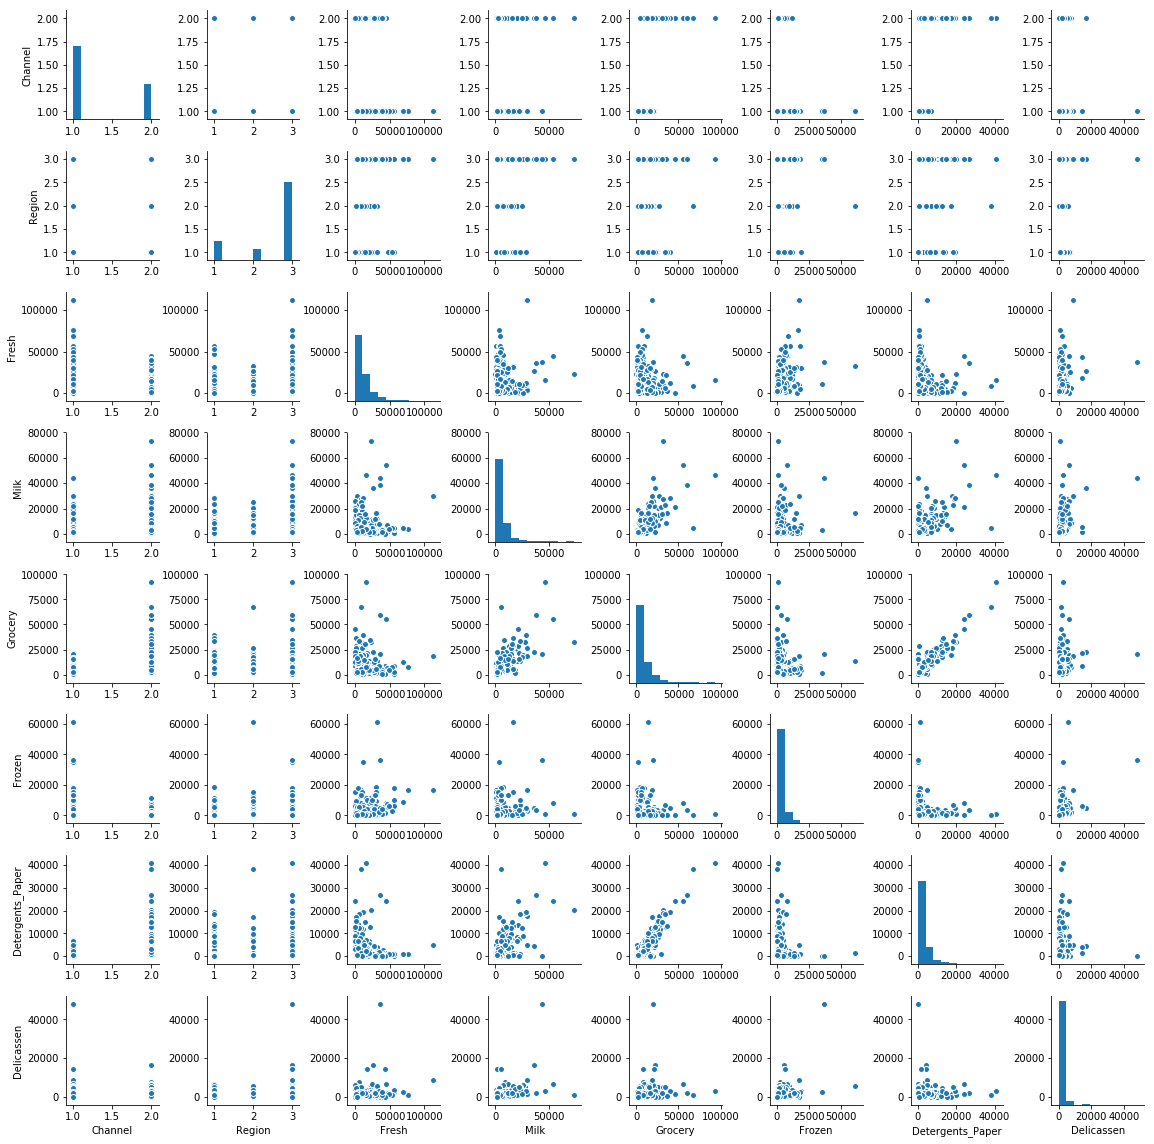

In [7]:
#散布図行列を出力
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.pairplot(df, size = 2.0)
plt.show()

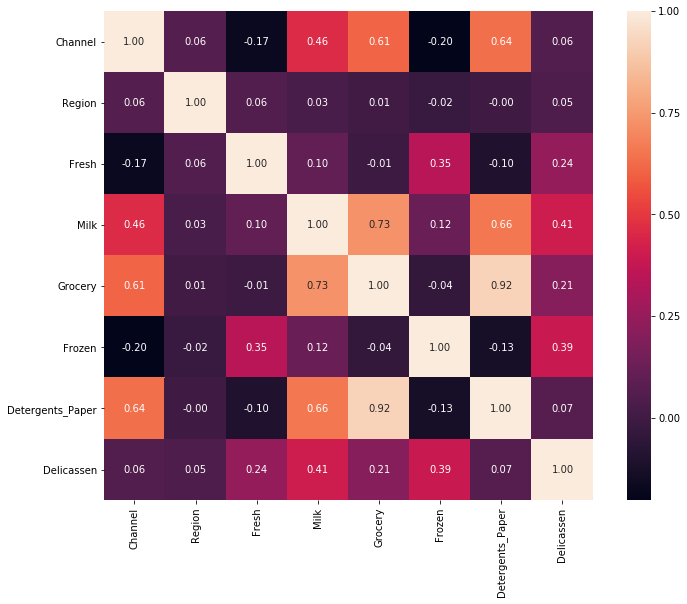

In [8]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(df.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [9]:
# 必要なライブラリを読み込み
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [10]:
X = df.loc[:, ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

In [11]:
X[:10]

array([[    2,     3, 12669,  9656,  7561,   214,  2674,  1338],
       [    2,     3,  7057,  9810,  9568,  1762,  3293,  1776],
       [    2,     3,  6353,  8808,  7684,  2405,  3516,  7844],
       [    1,     3, 13265,  1196,  4221,  6404,   507,  1788],
       [    2,     3, 22615,  5410,  7198,  3915,  1777,  5185],
       [    2,     3,  9413,  8259,  5126,   666,  1795,  1451],
       [    2,     3, 12126,  3199,  6975,   480,  3140,   545],
       [    2,     3,  7579,  4956,  9426,  1669,  3321,  2566],
       [    1,     3,  5963,  3648,  6192,   425,  1716,   750],
       [    2,     3,  6006, 11093, 18881,  1159,  7425,  2098]])

In [12]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)                   # 与えられた行列の各特徴量について､平均と標準偏差を算出
X_std = scaler.fit_transform(X) # Xを標準化した行列を生成

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=8) # 主成分を2つまで取得
X_pca = pca.fit_transform(X_std)

In [14]:
# 抽出した特徴量の値を出力(１０個)
X_pca[:10]

array([[ 0.84393893, -0.51535075, -0.76763222, -0.0442148 , -0.44623405,
        -0.93944129,  0.65476177,  0.01810169],
       [ 1.06267645, -0.48460126, -0.67297526,  0.40137178, -0.13045815,
        -0.86722684,  0.51102248,  0.0778948 ],
       [ 1.26914052,  0.68205455, -0.6640946 ,  1.63495276, -1.19381302,
        -1.07844165, -0.20315184, -0.2540374 ],
       [-1.05678239,  0.6108215 , -0.50565445,  0.19600495,  0.45785461,
         0.11695882, -0.31380387,  0.05437712],
       [ 0.63403048,  0.97419884, -0.77120882,  0.18637413, -0.81387739,
        -1.50537241, -0.16039894,  0.00376343],
       [ 0.5301109 , -0.58541138, -0.75862459,  0.24700875, -0.3788392 ,
        -1.07255387,  0.65856234, -0.02597659],
       [ 0.39956024, -0.84634288, -0.77755246, -0.20696307, -0.1668782 ,
        -1.19917041,  0.03631217, -0.03732631],
       [ 0.79116565, -0.46114017, -0.69660865,  0.48140348, -0.26155495,
        -1.09495488, -0.09240248,  0.06662474],
       [-0.66383113, -0.57746545

In [15]:
# 寄与率を出力
# 各主成分の寄与率がarrayの形式で入っている
# [第一主成分の寄与率 第二主成分の寄与率 ...]
print(pca.explained_variance_ratio_)

[ 0.38750123  0.22374588  0.12647173  0.09229904  0.06957905  0.05741354
  0.03514076  0.00784877]


In [16]:
# 累積寄与率を出力
# np.cumsum()で固有値の累積をとる
# [第1主成分までの累積寄与率 第2主成分までの累積寄与率 ...]
print(np.cumsum(pca.explained_variance_ratio_))

[ 0.38750123  0.61124711  0.73771884  0.83001788  0.89959693  0.95701047
  0.99215123  1.        ]


In [17]:
# 主成分の係数h_jを出力
pca.components_

array([[  4.28291564e-01,   2.47260253e-02,  -2.53194580e-02,
          4.74409947e-01,   5.36329145e-01,  -2.99745579e-02,
          5.23906297e-01,   1.64996527e-01],
       [ -2.04698855e-01,   4.31296430e-02,   5.13444679e-01,
          2.05540611e-01,  -8.71761988e-03,   5.92745252e-01,
         -1.21083091e-01,   5.33180819e-01],
       [ -8.29798863e-02,  -9.82500889e-01,  -8.89509074e-02,
          2.57510842e-02,   4.53143572e-02,   1.22156522e-01,
          4.74814388e-02,  -9.30199386e-04],
       [  2.96441646e-02,   7.78446249e-02,  -7.98475924e-01,
          5.40220237e-02,  -1.21586244e-01,   1.61316883e-01,
         -1.51012112e-01,   5.37557669e-01],
       [ -3.62058452e-02,   1.32508923e-01,  -2.58116864e-01,
         -7.20857633e-02,   1.11729898e-01,   7.54212444e-01,
          1.76502639e-01,  -5.44827208e-01],
       [ -8.63506696e-01,   8.97647905e-02,  -1.47474736e-01,
          3.15932560e-01,   2.13698887e-01,  -1.94359931e-01,
          1.95753557e-01,  -5.4

In [18]:
# 固有値lのルートを取る
np.sqrt(pca.explained_variance_)

array([ 1.76268867,  1.33941943,  1.0070147 ,  0.8602757 ,  0.74692727,
        0.67849437,  0.53081676,  0.25086486])

In [19]:
# 因子負荷量を出力
pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[  7.54944688e-01,   4.35842847e-02,  -4.46303218e-02,
          8.36237039e-01,   9.45381309e-01,  -5.28358138e-02,
          9.23483696e-01,   2.90837509e-01],
       [ -2.74177624e-01,   5.77686819e-02,   6.87717779e-01,
          2.75305088e-01,  -1.16765495e-02,   7.93934508e-01,
         -1.62181045e-01,   7.14152748e-01],
       [ -8.35619650e-02,  -9.89392835e-01,  -8.95748711e-02,
          2.59317203e-02,   4.56322237e-02,   1.23013413e-01,
          4.78145067e-02,  -9.36724453e-04],
       [  2.55021545e-02,   6.69678393e-02,  -6.86909437e-01,
          4.64738344e-02,  -1.04597692e-01,   1.38776995e-01,
         -1.29912051e-01,   4.62447801e-01],
       [ -2.70431332e-02,   9.89745285e-02,  -1.92794526e-01,
         -5.38428227e-02,   8.34541080e-02,   5.63341845e-01,
          1.31834635e-01,  -4.06946302e-01],
       [ -5.85884435e-01,   6.09049053e-02,  -1.00060779e-01,
          2.14358464e-01,   1.44993492e-01,  -1.31872120e-01,
          1.32817687e-01,  -3.7

In [20]:
# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_pca[:, 0:2])

In [21]:
# クラスタリングの結果を出力
import matplotlib.pyplot as plt
% matplotlib inline

# クラスタリングの結果をプロットする関数
# (クラスタの数, 学習器, 学習データ)
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    # 5クラスまでプロットできる
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

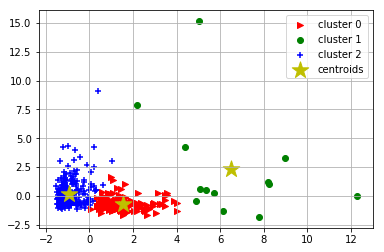

In [22]:
# プロットを実行
kmeans_plot(3, km, X_pca[:, 0:2])

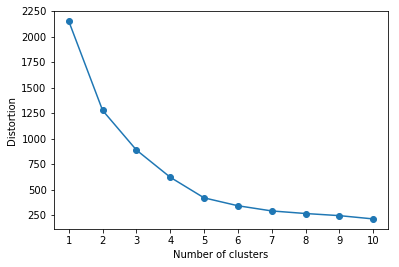

In [23]:
# エルボー法による､適切なkの値の確認

# 各kで算出されたSSEを格納するリストを定義
distortions = []

# kを変えながらk-means法を実行
for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_pca[:, 0:2])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [24]:
from sklearn.metrics import silhouette_samples

# 全サンプルのシルエット係数を計算
# (X, y_km, 利用する距離の種類)
# 'euclidiean' はユークリッド距離
s = silhouette_samples(X_pca[:, 0:2], y_km, metric='euclidean')

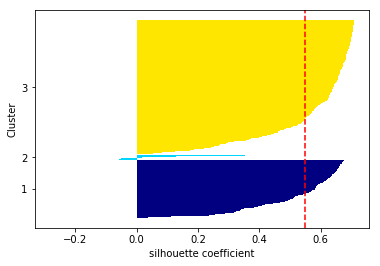

In [25]:
# シルエット図を出力
from matplotlib import cm

# シルエット図を出力する関数を定義
def draw_silhouettes(X, y_km):
    cluster_labels = np.unique(y_km)                     # クラスラベルを重複なく抽出
    n_clusters = cluster_labels.shape[0]                 # クラスタの数を算出

    # シルエット係数を計算
    # (X, y_km, 距離の種類)
    s = silhouette_samples(X, y_km, metric='euclidean')

    # 各ラベルごとにシルエット図を描画
    y_ax_lower, y_ax_upper= 0, 0                         # シルエット図の上端と下端の初期値を設定
    yticks = []                                          # 縦軸のメモリ位置を格納するリストを生成
    for i, label in enumerate(cluster_labels):
            label_s = s[y_km==label]                     # 該当するクラスタについて､シルエット係数を算出
            label_s.sort()                               # シルエット係数を小さい順に並べ替える
            y_ax_upper += len(label_s)                   # シルエット図の上端を､サンプルの数だけ引き上げる
            color = cm.jet(float(i) / n_clusters)        # color mapから色を取得
            plt.barh(range(y_ax_lower, y_ax_upper),      # 横軸の範囲を指定
                             label_s,                    # バーの幅を指定
                             height=1.0,                 # バーの厚みを指
                             color=color)                # バーの色を指定
            yticks.append((y_ax_lower + y_ax_upper) / 2) # クラスタラベルの表示位置を追加
            y_ax_lower += len(label_s)                   # シルエット図の下端を､サンプルの数だけ引き上げる

            
    plt.axvline(np.mean(s), color="red", linestyle="--") # 係数の平均値に破線を引く(横軸の値, 色, 線の形式)
    plt.yticks(yticks, cluster_labels + 1)               # クラスタレベルを表示(位置, 縦軸の値)
    plt.ylabel('Cluster')
    plt.xlabel('silhouette coefficient')
    plt.show()

# シルエット図を出力
draw_silhouettes(X_pca[:, 0:2], y_km)
#これだとうまくいかない

In [28]:
#Channelごと、Regionごとに分けてクラスタリングしてみる
df_r1 = df.loc[df.Region == 1]
df_r2 = df.loc[df.Region == 2]
df_r3 = df.loc[df.Region == 3]

df_c1 = df.loc[df.Channel == 1]
df_c2 = df.loc[df.Channel == 2]

In [29]:
df_r1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
196,1,1,30624,7209,4897,18711,763,2876
197,2,1,2427,7097,10391,1127,4314,1468
198,1,1,11686,2154,6824,3527,592,697
199,1,1,9670,2280,2112,520,402,347
200,2,1,3067,13240,23127,3941,9959,731


In [ ]:
#Channelごと、Regionごとに分けて主成分分析

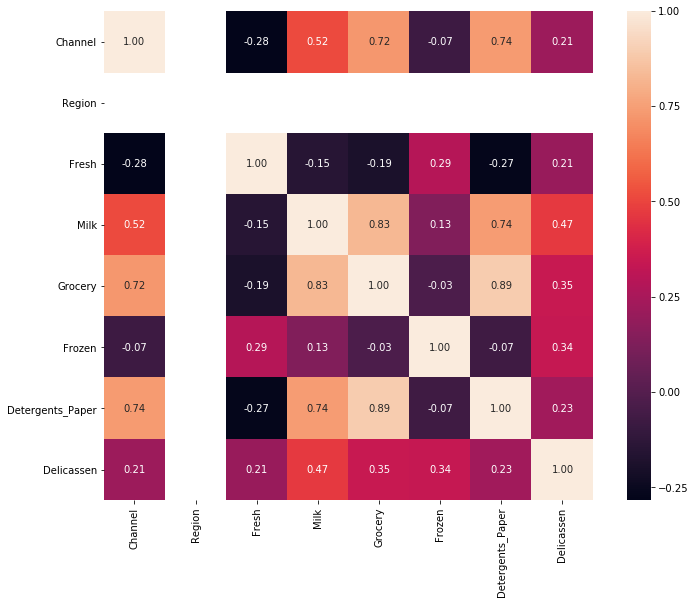

In [30]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(df_r1.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [31]:
X_r1 = df_r1.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_r2 = df_r2.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_r3 = df_r3.loc[:, ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

X_c1 = df_c1.loc[:, ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values
X_c2 = df_c2.loc[:, ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].values

In [33]:
#データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_r1)       # 与えられた行列の各特徴量について､平均と標準偏差を算出
scaler.fit(X_r2)    
scaler.fit(X_r3)    
scaler.fit(X_c1)    
scaler.fit(X_c2)    
X_r1_std = scaler.fit_transform(X_r1) # Xを標準化した行列を生成
X_r2_std = scaler.fit_transform(X_r2)
X_r3_std = scaler.fit_transform(X_r3)
X_c1_std = scaler.fit_transform(X_c1)
X_c2_std = scaler.fit_transform(X_c2)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=7) # 主成分を2つまで取得
X_r1_pca = pca.fit_transform(X_r1_std)
X_r2_pca = pca.fit_transform(X_r2_std)
X_r3_pca = pca.fit_transform(X_r3_std)
X_c1_pca = pca.fit_transform(X_c1_std)
X_c2_pca = pca.fit_transform(X_c2_std)

In [35]:
# 寄与率を出力
# 各主成分の寄与率がarrayの形式で入っている
# [第一主成分の寄与率 第二主成分の寄与率 ...]
print(pca.explained_variance_ratio_)

[ 0.37494413  0.21785608  0.16492891  0.10044267  0.0806524   0.05108277
  0.01009304]


In [53]:
# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_r1_km = km.fit_predict(X_r1_pca[:, 0:2])
y_r2_km = km.fit_predict(X_r2_pca[:, 0:2])
y_r3_km = km.fit_predict(X_r3_pca[:, 0:2])
y_c1_km = km.fit_predict(X_c1_pca[:, 0:2])
y_c2_km = km.fit_predict(X_c2_pca[:, 0:2])

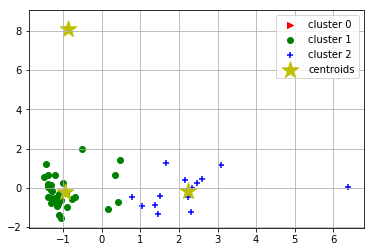

In [55]:
# プロットを実行
kmeans_plot(3, km, X_r2_pca[:, 0:2])

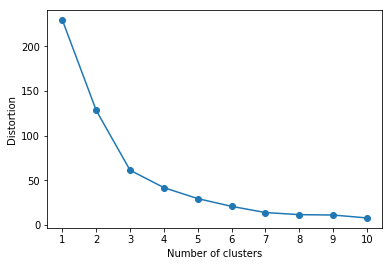

In [57]:
# エルボー法による､適切なkの値の確認

# 各kで算出されたSSEを格納するリストを定義
distortions = []

# kを変えながらk-means法を実行
for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_r2_pca[:, 0:2])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [50]:
from sklearn.metrics import silhouette_samples

# 全サンプルのシルエット係数を計算
# (X, y_km, 利用する距離の種類)
# 'euclidiean' はユークリッド距離
s_r1 = silhouette_samples(X_r1_pca[:, 0:2], y_r1_km, metric='euclidean')
s_r2 = silhouette_samples(X_r2_pca[:, 0:2], y_r2_km, metric='euclidean')
s_r3 = silhouette_samples(X_r3_pca[:, 0:2], y_r3_km, metric='euclidean')
s_c1 = silhouette_samples(X_c1_pca[:, 0:2], y_c1_km, metric='euclidean')
s_c2 = silhouette_samples(X_c2_pca[:, 0:2], y_c2_km, metric='euclidean')

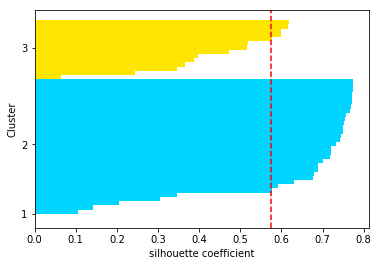

In [58]:
# シルエット図を出力
draw_silhouettes(X_r2_pca[:, 0:2], y_r2_km)

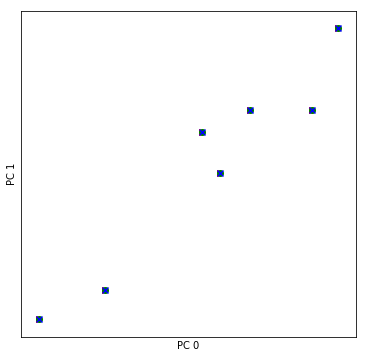

In [61]:
# 特徴抽出による可視化
# PC0とPC1について散布図を表示
plt.figure(figsize=(6, 6))
for target, marker, color in zip(range(3), '>ox', 'rgb'):
    plt.scatter(X_r3_pca[0], X_r3_pca[1], marker=marker, color=color)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.xticks([])
plt.yticks([])
plt.show()

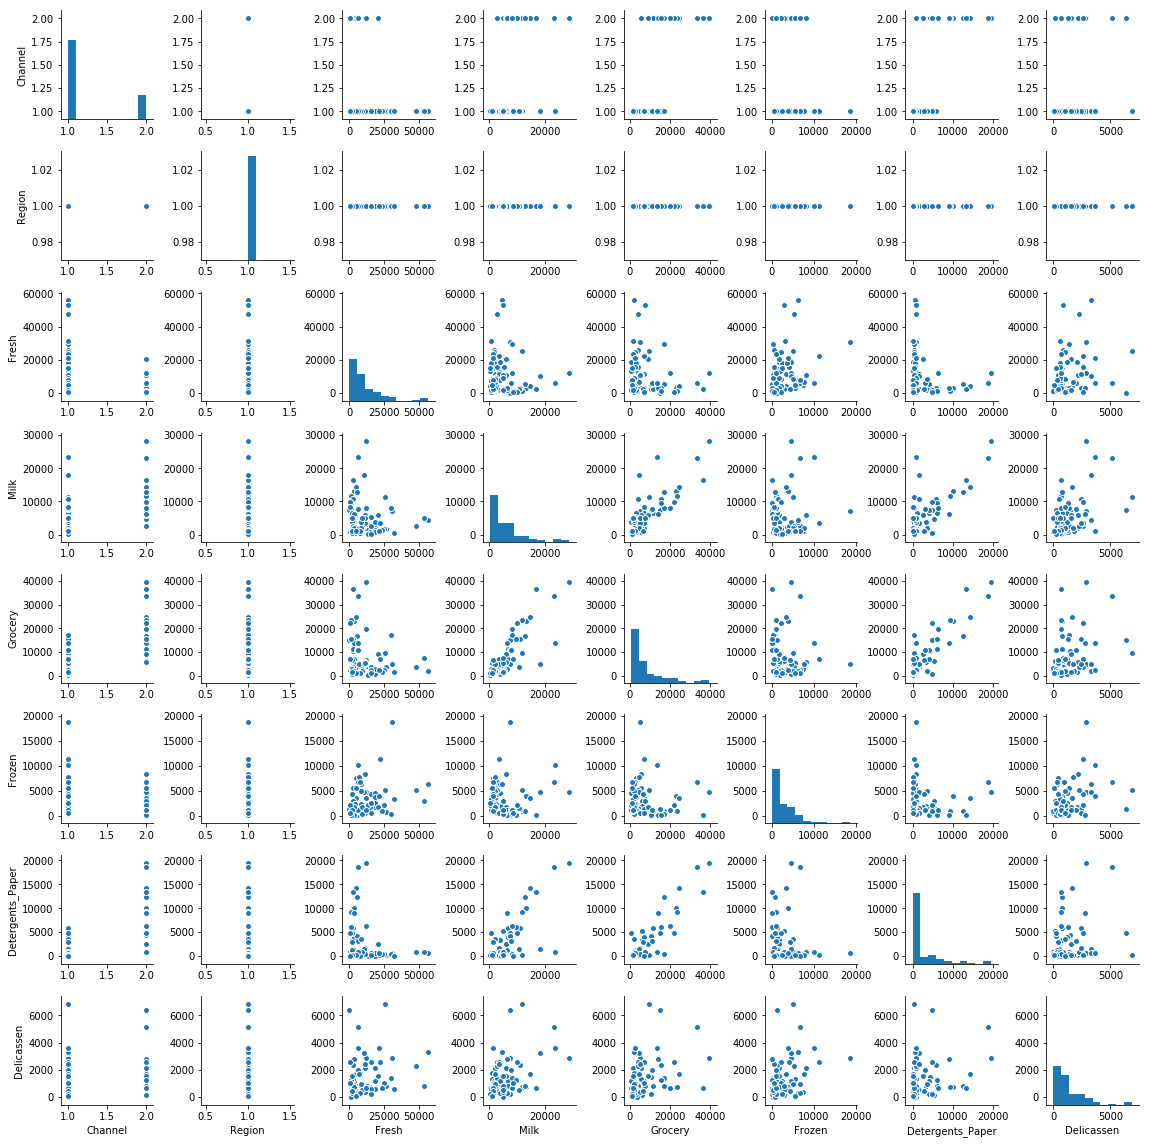

In [63]:
#散布図行列を出力
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.pairplot(df_r1, size = 2.0)
plt.show()

In [ ]:
df_t = df.loc[df.Fresh<35000, df.Milk<20000, df.Grocery<30000, df.Frozen<15000, df.Detergents_Paper<16000, df.Delocassen<5000]

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


([array([ 73.,  56.,  50.,  28.,  27.,  15.,  14.,  12.,   2.,   6.,   5.,
           2.,   1.,   1.,   3.]),
  array([ 53.,  29.,  21.,  11.,  12.,   7.,   4.,   1.,   1.,   1.,   1.,
           1.,   0.,   0.,   0.])],
 array([     0.,   4000.,   8000.,  12000.,  16000.,  20000.,  24000.,
         28000.,  32000.,  36000.,  40000.,  44000.,  48000.,  52000.,
         56000.,  60000.]),
 <a list of 2 Lists of Patches objects>)

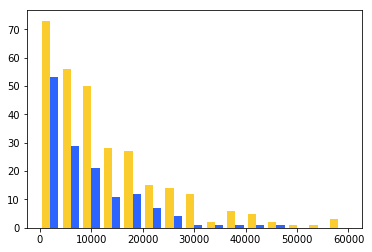

In [64]:
plt.hist([df_c1['Fresh'],df_c2['Fresh']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))